# Designing a CNN architecture and its formation.

The third assignment consists in the classification of
numbers from 0 to 9, developing a convolutional neural network, starting from the MNIST dataset.
Moreover there is a constraint in the number of parameters used: maximum 6000.


In [ ]:
# amount some libraries for the analysis of the data and development of the model
import numpy as np
import matplotlib.pyplot as plt

# DL ops
from tensorflow import keras
from tensorflow.keras import layers

# Inspecting the data



During the exploration of the dataset we immediately notice that the size of the train set is 60000 records, while 10000 for the test set, each containing the image of a number from 0 to 9 in a matrix 28x28, which indicates the gray scale of each pixel of the image. 

In [ ]:
# load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

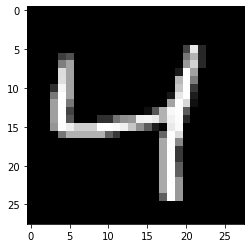

In [ ]:
plt.imshow(x_train[2].reshape([28,28]), cmap="gray")

# Preparing the data


Normalization was done by simply dividing each number by 255, since the range of numbers in the above matrices is from 0 to 255. After that a reshape is done, since the convolutional layers need to know how many channels there are for each image, in this case one since they are black and white photos. Then we proceeded with the categorization of the variable to be categorized, equal to 10.

In [ ]:
# scale images in [0,1]
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255
# images 28x28
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print('x_train_shape:', x_train.shape)

num_classes = 10
input_shape = (28,28,1)

#convert class vectors to binary class matrices
print('y_train_shape:', y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train_shape:', y_train.shape)

x_train_shape: (60000, 28, 28, 1)
y_train_shape: (60000,)
y_train_shape: (60000, 10)


# Building the network

NEURAL NETWORK:
- 75 epochs
- 2 convolutional layers, with respectively 10 and 4 filters, size 3x3, no padding
- 2 pooling layers (MaxPooling2D) of size 2x2, "same" padding
- 1 dense layer of 35 neurons
- 2 dropout layers
- activation function layers: ReLU
- activation function output layer: Softmax
- optimizer: RMSprop
- batch size: 512
- loss function: categorical_crossentropy

The number of epochs was chosen based on when the accuracy of the train set and the test set reached convergence, avoiding overfitting and/or underfitting Respecting the limit imposed on the parameters, choices were made on the number of neurons and the size of the filters in the convolutional layers. The activation function ReLU is a fairly standard choice and was the most performing while for the activation function of the output layer the Softmax was a choice forced by the fact that it was a multiclass classification. The optimizer used for this model was RMSprop, an algorithm that is widely used in the literature when developing convolutional neural networks and that was in fact the most performant. To avoid overfitting, two dropout layers were introduced.

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     
     layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='valid'),
     layers.MaxPooling2D(pool_size=(2,2), padding='same'),
     layers.Dropout(0.1), 
     
     layers.Conv2D(4, kernel_size=(3,3), activation='relu', padding='valid'),
     layers.MaxPooling2D(pool_size=(2,2), padding='same'),
     
     layers.Flatten(),
     layers.Dense(35, activation='relu'),
     layers.Dropout(0.1),
     
     layers.Dense(num_classes, activation='softmax')
     ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 4)         364       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 4)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0

1. INPUT
2. CONVOLUTIONAL, SHAPE 26x26x10, PARAMETERS [(1 * 3 * 3 * 10)+10] = 100
3. POOLING, SHAPE 13x13x10, PARAMETERS 0
4. DROPOUT, SHAPE 13x13x10, PARAMETRS 0
5. CONVOLUTIONAL, SHAPE 11x11x4, PARAMETERS [(10 * 3 * 3 * 4)+4] = 364
6. POOLING, SHAPE 6x6x4, PARAMETERS 0
7. FLATTERN
8. DENSE, SHAPE 35, PARAMETERS (144 * 35)+35 = 5075
9. DROPOUT, SHAPE 35, PARAMETERS 0
10. OUTPUT, SHAPE 10, PARAMETERS (35 * 10)+10 = 360

**TOTAL = 5899**


In [ ]:
batch_size = 512
epochs = 75

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
network_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/75
94/94 [==============================] - 15s 19ms/step - loss: 1.2745 - accuracy: 0.5991 - val_loss: 0.5128 - val_accuracy: 0.8597
Epoch 2/75
94/94 [==============================] - 1s 13ms/step - loss: 0.5156 - accuracy: 0.8400 - val_loss: 0.3089 - val_accuracy: 0.9114
Epoch 3/75
94/94 [==============================] - 1s 12ms/step - loss: 0.3629 - accuracy: 0.8889 - val_loss: 0.2318 - val_accuracy: 0.9320
Epoch 4/75
94/94 [==============================] - 1s 12ms/step - loss: 0.2859 - accuracy: 0.9126 - val_loss: 0.2047 - val_accuracy: 0.9374
Epoch 5/75
94/94 [==============================] - 1s 12ms/step - loss: 0.2391 - accuracy: 0.9265 - val_loss: 0.1687 - val_accuracy: 0.9490
Epoch 6/75
94/94 [==============================] - 1s 12ms/step - loss: 0.2078 - accuracy: 0.9357 - val_loss: 0.1476 - val_accuracy: 0.9554
Epoch 7/75
94/94 [==============================] - 1s 12ms/step - loss: 0.1876 - accuracy: 0.9427 - val_loss: 0.1310 - val_accuracy: 0.9588
Epoch 8/75
9

# Analyze and comment the training results

There does not appear to be any indication of underfitting/overfitting. The two curves have similar trends and the loss function is relatively small. 

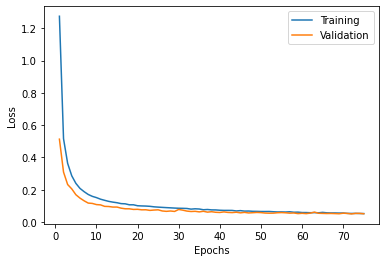

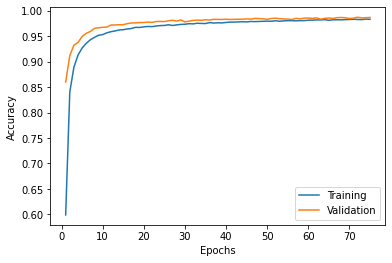

In [ ]:
x_plot = list(range(1,epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

# Model evaluations and conclusions


The performance of the model is very good even using few parameters, the ratio between model complexity and results, using this type of network for this problem, is really appreciable.

In [ ]:
# evaluate on test
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Train loss:', network_history.history['loss'][-1])
print('Train accuracy:', network_history.history['accuracy'][-1])

Test loss: 0.046000394970178604
Test accuracy: 0.986299991607666
Train loss: 0.05190221220254898
Train accuracy: 0.9828125238418579
